1. Get a main results graph ✓
    1. Double-check the discretionary passing years ✓
2. Get graphs by state
3. Prepare main results table
4. Prepare dynamic results table
4. Prepare dynamic results graph
5. ~Prepare age-based results table~
6. Test any cause-related results ✓
6. Create descriptive stats table
7. Double-check years of passing. ✓
7. Go over paper
    1. Change results, conclusions and intro
    2. There are a few additional works to cite in https://www.preventdvgunviolence.org/dv-and-firearms-zeoli.pdf
    3. Explain identification strategy better
8. Go over paper again

In [1]:
import re
import numpy as np
import pandas as pd

import seaborn
from matplotlib import ticker

# Load Data

## Load Mortality Data

In [2]:
mortality_by_state = pd.read_stata('../processed_data/mortality_by_state_v3.5.dta')
del mortality_by_state['index']
mortality_by_state = mortality_by_state.query("not staters in(['ZZ', 'PR', 'VI', 'GU', 'AS'])")

In [3]:
with pd.option_context('max_rows', None):
    display(mortality_by_state.sample(5).T)

,1018,912,440,1160,177
staters,PA,NE,MS,MS,MI
total_deaths,122329,14054,21322,24408,73520
total_pop,8.65831e+06,1.09701e+06,1.52257e+06,1.76892e+06,5.48084e+06
male_deaths,61634,7314,11942,12745,41762
female_deaths,60695,6740,9380,11663,31758
pop_male,4.04562e+06,523033,710870,821410,2.62508e+06
pop_female,4.61269e+06,573978,811701,947513,2.85575e+06
male_white_deaths,55668,7121,7742,8290,36920
male_black_deaths,5966,193,4200,4455,4842
female_white_deaths,55526,6594,5901,7711,28542


## Load Codification Data

In [4]:
with open('../treatment/mand_n_rec.do') as treatment_file:
    laws_in_states = []
    for line in treatment_file.readlines():
        m = re.match(r'^local law ([a-z_]+)$', line)
        if m:
            law = m[1]
        if law:
            m = re.match(r'^replace.*([A-Z]{2}).*([0-9]{4})', line)
            if m:
                state = m[1]
                year_of_passing = int(m[2])
                laws_in_states.append((state, law, year_of_passing))
    print(len(laws_in_states))
laws_in_states = pd.DataFrame(laws_in_states, columns=['state', 'law', 'year_of_passing'])
display(laws_in_states)
assert len(laws_in_states) >= 51

55


,state,law,year_of_passing
0,AL,discretionary,1989
1,AZ,discretionary,1991
2,DE,discretionary,1984
3,FL,discretionary,1992
4,GA,discretionary,1981
5,HI,discretionary,1980
6,ID,discretionary,1979
7,IN,discretionary,2000
8,IA,discretionary,1986
9,KY,discretionary,1980


## Merge

In [5]:
mortality_by_state_with_treatment = mortality_by_state.merge(laws_in_states, how='left', left_on='staters', right_on='state')
mortality_by_state_with_treatment['years_after_passing'] = mortality_by_state_with_treatment['year'] - mortality_by_state_with_treatment['year_of_passing']
mortality_by_state_with_treatment[['staters', 'year', 'years_after_passing']]

,staters,year,years_after_passing
0,AK,1969,-27
1,AL,1969,-20
2,AR,1969,-22
3,AZ,1969,-22
4,AZ,1969,-22
...,...,...,...
1967,VT,2004,19
1968,WA,2004,9
1969,WI,2004,15
1970,WV,2004,10


# Set the Main Variable of Interest

In [6]:
population_of_interest = 'female_black'

# Get a main results graph

In [12]:
years_before = -5
years_after = 10

In [23]:
def get_results_graph(population_of_interest, years_before, years_after, title):
    mortality_rate_by_state_with_treatment = mortality_by_state_with_treatment.copy()
    mortality_rate_by_state_with_treatment[population_of_interest + '_mortality_rate'] = \
        100000 * \
        mortality_rate_by_state_with_treatment[population_of_interest + '_deaths'] / mortality_rate_by_state_with_treatment['pop_' + population_of_interest]

    baseline_mortality = mortality_rate_by_state_with_treatment[(mortality_rate_by_state_with_treatment['years_after_passing'] < 0) & (mortality_rate_by_state_with_treatment['years_after_passing'] >= years_before)]\
        .groupby('state')[population_of_interest + '_mortality_rate']\
        .mean()\
        .to_frame()\
        .rename(columns={population_of_interest + '_mortality_rate': population_of_interest + '_baseline_mortality_rate'})\
        .reset_index()
    
    mortality_rate_by_state_with_treatment_and_baseline = mortality_rate_by_state_with_treatment.merge(baseline_mortality, how='left', on='state')
    mortality_rate_by_state_with_treatment_and_baseline['percent_change_in_mortality'] = \
        mortality_rate_by_state_with_treatment_and_baseline[population_of_interest + '_mortality_rate'] \
        / mortality_rate_by_state_with_treatment_and_baseline[population_of_interest + '_baseline_mortality_rate'] - 1
    
    
    graph_data = mortality_rate_by_state_with_treatment_and_baseline[mortality_rate_by_state_with_treatment_and_baseline['years_after_passing'].between(years_before, years_after)].copy()

    ax = seaborn.lineplot(x='years_after_passing',
                          y='percent_change_in_mortality',
                          ci=None,
                          style='law',
                          style_order=['mand_n_rec', 'discretionary'],
                          data=graph_data)
    ax.figure.set_figwidth(14)
    ax.figure.set_figheight(7)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:.0f}%'.format(y * 100)))
#     x_axis_ticks = [int(tick) for tick in np.arange(*ax.get_xlim()) if tick % 2 == 0]
#     ax.xaxis.set_major_locator(ticker.FixedLocator(x_axis_ticks))
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('Mortality Rate', fontsize=16)
    ax.set_xlabel('Years After the Law Passing', fontsize=12)
    ax.axvline(linestyle=':')
    ax.yaxis.grid(which='major', linestyle=':', color='b')
    legend_mapping = {'law': 'Arrest Law in State', 'mand_n_rec': 'Mandatory & Recommended', 'discretionary': 'Discretionary'}
    
    for txt in ax.legend().texts:
        txt.set_text(legend_mapping[txt.get_text()])
    fig = ax.get_figure()
    fig.savefig(f'../manuscript/visuals/{population_of_interest}.png')

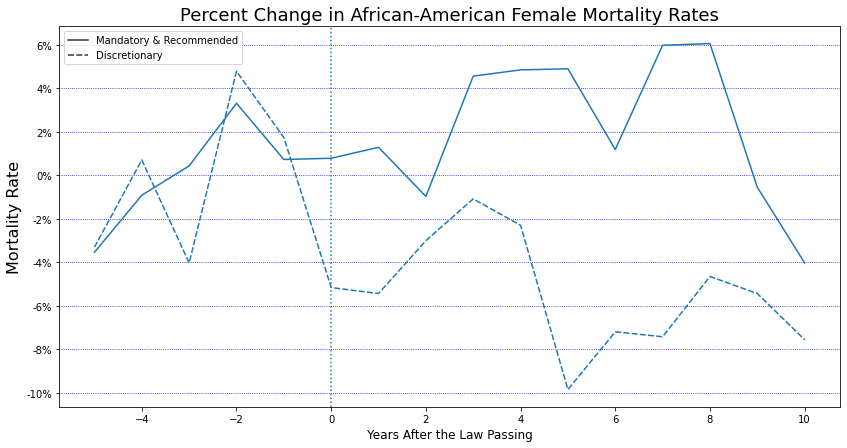

In [25]:
get_results_graph(
    'female_black', 
    years_before, 
    years_after,
    title='Percent Change in African-American Female Mortality Rates')

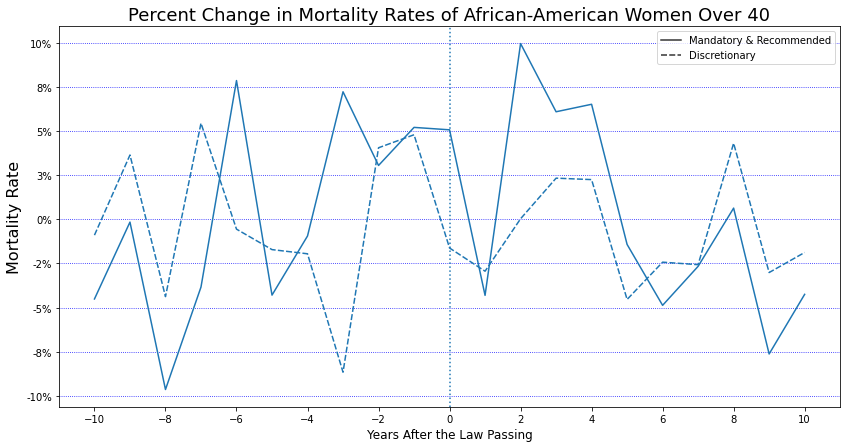

In [34]:
get_results_graph(
    'female_black_over_40', 
    years_before, 
    years_after,
    title='Percent Change in Mortality Rates of African-American Women Over 40')